# Old Car Price Prediction ( Group 10 )

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import savetxt

data_path="Datasets/used_car_dataset.csv"
car_data=pd.read_csv(data_path)


# Data Exploration

In [3]:
car_data.columns

Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'F1', 'F2', 'F3',
       'F4'],
      dtype='object')

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         9997 non-null   float64
 1   year          9997 non-null   float64
 2   manufacturer  9997 non-null   object 
 3   condition     9997 non-null   object 
 4   cylinders     9997 non-null   object 
 5   fuel          9997 non-null   object 
 6   odometer      9331 non-null   float64
 7   transmission  9997 non-null   object 
 8   type          9997 non-null   object 
 9   paint_color   9997 non-null   object 
 10  F1            9997 non-null   int64  
 11  F2            9997 non-null   float64
 12  F3            9997 non-null   float64
 13  F4            9997 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 1.1+ MB


In [5]:
car_data.describe()

,price,year,odometer,F1,F2,F3
count,9997.000000,9997.000000,9.331000e+03,9997.000000,9997.000000,9997.000000
mean,14262.349305,2009.814144,1.120436e+05,1523.945584,2.225496,0.099283
std,12520.818169,8.862341,8.055942e+04,2090.438720,0.227250,0.100833
min,0.000000,1922.000000,0.000000e+00,4.000000,0.167352,-0.313948
25%,5643.000000,2007.000000,6.653300e+04,311.000000,2.133806,0.029968
50%,10463.000000,2012.000000,1.100000e+05,717.000000,2.255670,0.099648
75%,19464.000000,2015.000000,1.500000e+05,1966.000000,2.362382,0.167504
max,402498.000000,2021.000000,2.074484e+06,36773.000000,2.742570,0.473412


# Data Preprocessing

price             0
year              0
manufacturer      0
condition         0
cylinders         0
fuel              0
odometer        666
transmission      0
type              0
paint_color       0
F1                0
F2                0
F3                0
F4                0
dtype: int64

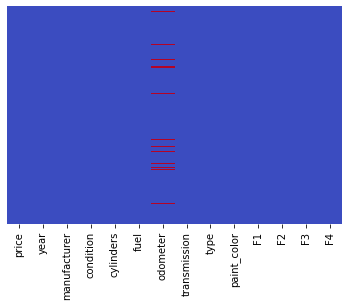

In [6]:
#Heat Map to visualize the null values in the data.
sns.heatmap(car_data.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')
#Printing the Null Values if any!
car_data.isnull().sum()

In [7]:
print(car_data['odometer'].mean())
print(car_data['odometer'].median())
len(car_data['odometer'])

112043.61279605616
110000.0


9997

In [8]:
## Fill Missing Values in Odometer with the Median Value.
car_data['odometer']=car_data['odometer'].fillna(car_data['odometer'].median())

<AxesSubplot:>

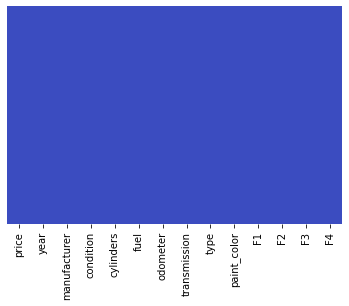

In [9]:
car_data.isnull().sum()
sns.heatmap(car_data.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [10]:
car_data['cylinders']=car_data.apply(lambda x: str(x['cylinders'])[:1],axis=1)

In [11]:
car_data['cylinders'].value_counts()

6    3637
8    3233
4    3127
Name: cylinders, dtype: int64

In [12]:
car_data['cylinders']=car_data['cylinders'].astype('int')

# Outlier Detection & Data Cleaning

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='year', ylabel='price'>,
        <AxesSubplot:xlabel='cylinders', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>,
        <AxesSubplot:xlabel='F1', ylabel='price'>,
        <AxesSubplot:xlabel='F2', ylabel='price'>,
        <AxesSubplot:xlabel='F3', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='year'>,
        <AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='cylinders', ylabel='year'>,
        <AxesSubplot:xlabel='odometer', ylabel='year'>,
        <AxesSubplot:xlabel='F1', ylabel='year'>,
        <AxesSubplot:xlabel='F2', ylabel='year'>,
        <AxesSubplot:xlabel='F3', ylabel='year'>],
       [<AxesSubplot:xlabel='price', ylabel='cylinders'>,
        <AxesSubplot:xlabel='year', ylabel='cylinders'>,
        <AxesSubplot:xlabel='cylinders', ylabel='cylinders'>,
        <AxesSubplot:xlabel='odometer', ylabel='cylinders'>,
        <AxesSubp

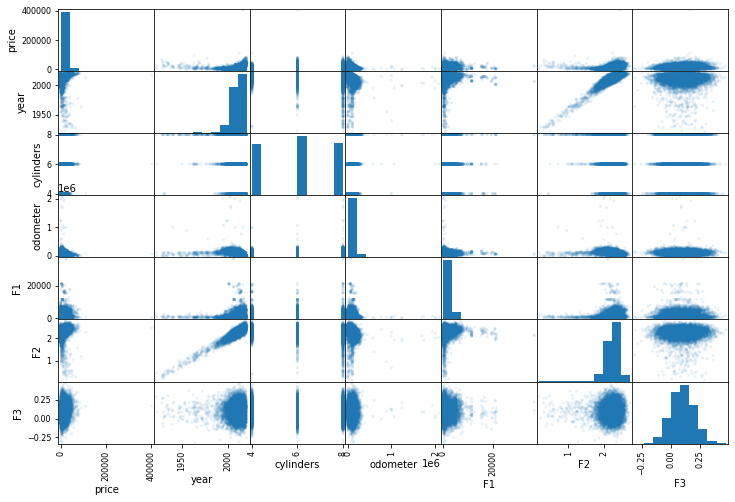

In [13]:
#Visualizing the outliers using Scatter Matrix
pd.plotting.scatter_matrix(car_data, figsize = (12,8), alpha = 0.1)

<AxesSubplot:xlabel='odometer'>

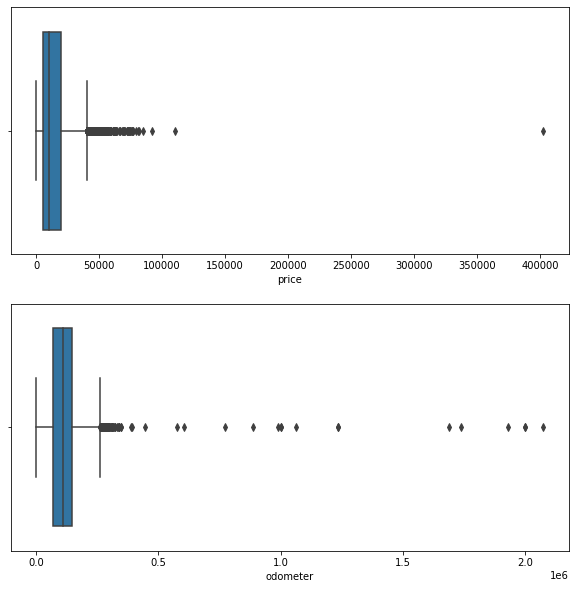

In [14]:
#Using Box Plot to Visualize the Outliers
plt.figure(figsize=[10,10])
plt.subplot(211)
sns.boxplot(x=car_data['price'])
plt.subplot(212)
sns.boxplot(x=car_data['odometer'])

In [15]:
#Dropping 10% of each side on price
import numpy as np
rr=sorted(car_data["price"])
quantile1, quantile2= np.percentile(rr,[10,90])
print(quantile1,quantile2)

3011.0 31819.4


In [16]:
car_data=car_data[(car_data.price <= 31819.4) & (car_data.price >= 3011.0)]
car_data.shape

(7998, 14)

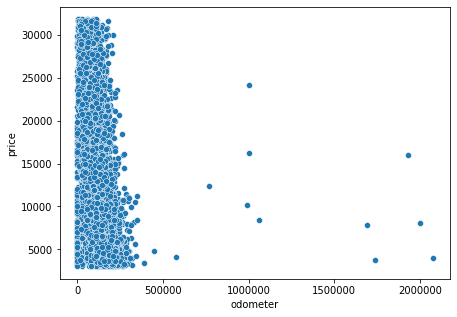

In [17]:
#Using Scatter Plot to Visualize the Outliers in Odometer
plt.figure(figsize=[7,5])
ax = sns.scatterplot(x = car_data['odometer'], y= car_data['price'])
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [18]:
#Removing Outlier
car_data=car_data[(car_data.odometer < 500000)]

In [19]:
#Removing the values where odometer is Zero
car_data.drop(car_data[car_data["odometer"]==0.0].index,inplace=True)

In [20]:
car_data=car_data[(car_data.odometer < 300000)]

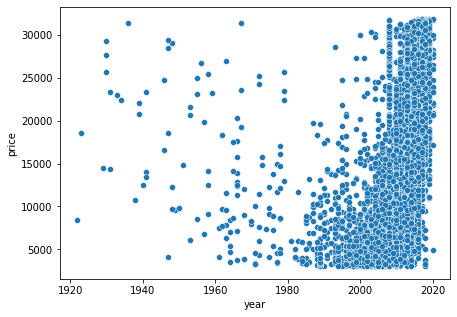

In [21]:
#Using Scatter Plot to Visualize the Outliers in year
plt.figure(figsize=[7,5])
ax = sns.scatterplot(x = car_data['year'], y= car_data['price'])
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [22]:
#Removing Outliers
car_data=car_data[(car_data.year > 1980 )]

In [23]:
#Comparing the Condition and Odometer
bins = [0, 30000, 60000, 90000,115000, 150000,10000000]
groups = car_data.groupby(['condition', pd.cut(car_data.odometer, bins)])
groups.size().unstack()

odometer,"(0, 30000]","(30000, 60000]","(60000, 90000]","(90000, 115000]","(115000, 150000]","(150000, 10000000]"
condition,,,,,,
excellent,230,440,639,1040,941,799
fair,3,4,10,24,38,82
good,107,120,298,564,703,949
like new,124,113,149,202,145,122


In [24]:
#Removing the Values where condition is Fair
car_data.drop(car_data[car_data["condition"]=='fair'].index,inplace=True)

In [25]:
#Comparing the Condition and Year
bins = [1920, 1930, 1940,1950,1960,1970,1980,1990,2000,2010,2020,2030]
groups = car_data.groupby(['condition', pd.cut(car_data.year, bins)])
groups.size().unstack()

year,"(1920, 1930]","(1930, 1940]","(1940, 1950]","(1950, 1960]","(1960, 1970]","(1970, 1980]","(1980, 1990]","(1990, 2000]","(2000, 2010]","(2010, 2020]","(2020, 2030]"
condition,,,,,,,,,,,
excellent,0,0,0,0,0,0,21,122,1387,2559,0
good,0,0,0,0,0,0,40,204,1391,1106,0
like new,0,0,0,0,0,0,0,12,228,615,0


In [26]:
#Considering only the Values where year is greater than 1990
car_data=car_data[(car_data.year > 1990 )]

In [27]:
car_data.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,type,paint_color,F1,F2,F3,F4
0,18219.0,2008.0,ford,excellent,8,gas,86238.0,automatic,pickup,black,5823,2.193844,-0.031986,b
2,23660.0,2016.0,ford,good,8,gas,119026.0,automatic,truck,white,294,2.160859,0.046984,c
3,5335.0,2009.0,ford,excellent,4,gas,69000.0,manual,sedan,blue,3544,2.114929,-0.110121,c
6,16450.0,2017.0,ford,excellent,4,gas,36618.0,automatic,SUV,white,1322,2.244907,0.126708,b
8,28960.0,2011.0,ford,excellent,8,gas,110000.0,automatic,pickup,white,6561,2.293774,0.163063,c


In [28]:
#Since Manufacturer and type can be correlated so,we will join these 2 columns and drop the type column
car_data['manufacturer'] = car_data['manufacturer'] + ' (' + car_data['type'] + ')'
car_data.drop(['type'], axis = 1, inplace=True)
car_data.head(5)

/home/nshah/.local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/home/nshah/.local/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,paint_color,F1,F2,F3,F4
0,18219.0,2008.0,ford (pickup),excellent,8,gas,86238.0,automatic,black,5823,2.193844,-0.031986,b
2,23660.0,2016.0,ford (truck),good,8,gas,119026.0,automatic,white,294,2.160859,0.046984,c
3,5335.0,2009.0,ford (sedan),excellent,4,gas,69000.0,manual,blue,3544,2.114929,-0.110121,c
6,16450.0,2017.0,ford (SUV),excellent,4,gas,36618.0,automatic,white,1322,2.244907,0.126708,b
8,28960.0,2011.0,ford (pickup),excellent,8,gas,110000.0,automatic,white,6561,2.293774,0.163063,c


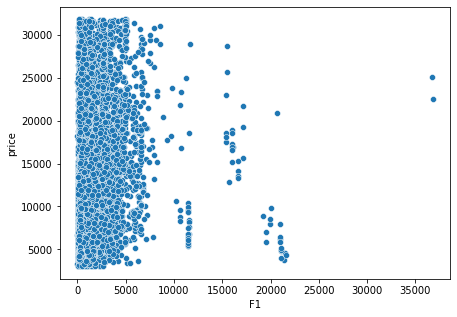

In [29]:
#Handling the Outliers of F1,F2,F3,F4.
plt.figure(figsize=[7,5])
ax = sns.scatterplot(x = car_data['F1'], y= car_data['price'])
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [30]:
car_data=car_data[(car_data.F1 <= 10000) & (car_data.F1 >= 4)]

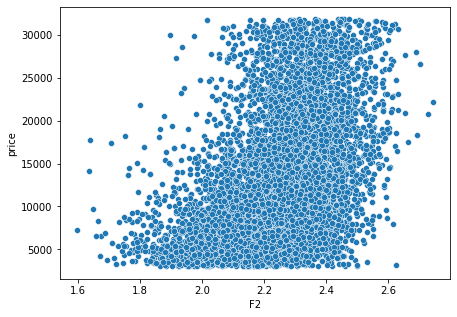

In [31]:
plt.figure(figsize=[7,5])
ax = sns.scatterplot(x = car_data['F2'], y= car_data['price'])
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [32]:
car_data=car_data[(car_data.F2 <= 2.6) & (car_data.F2 >= 1.8)]

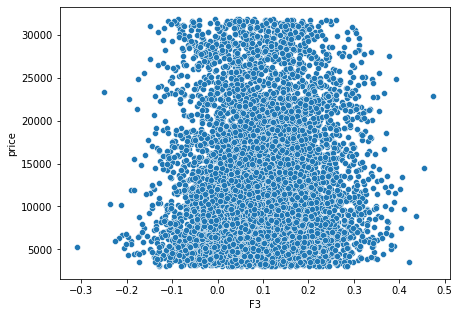

In [33]:
plt.figure(figsize=[7,5])
ax = sns.scatterplot(x = car_data['F3'], y= car_data['price'])
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [34]:
car_data=car_data[(car_data.F3 <= 3.8) & (car_data.F3 >= -0.15)]

In [35]:
car_data.shape

(7430, 13)

In [36]:
#Print the list of Categorical Data in the dataset
s=(car_data.dtypes == 'object')
cat_cols = list(s[s].index)

In [37]:
#Printing the unique values in Categorical columns
for col in cat_cols:
    print ([col]," : ",car_data[col].unique())

['manufacturer']  :  ['ford (pickup)' 'ford (truck)' 'ford (sedan)' 'ford (SUV)' 'subaru (SUV)'
 'subaru (sedan)' 'subaru (pickup)' 'subaru (truck)']
['condition']  :  ['excellent' 'good' 'like new']
['fuel']  :  ['gas']
['transmission']  :  ['automatic' 'manual']
['paint_color']  :  ['black' 'white' 'blue' 'silver' 'red']
['F4']  :  ['b' 'c' 'a']


In [38]:
#Performing Label Encoding to the Categorical Data
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for col in cat_cols:
    car_data[col] = le.fit_transform(car_data[col])
    
car_data.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,paint_color,F1,F2,F3,F4
0,18219.0,2008.0,1,0,8,0,86238.0,0,0,5823,2.193844,-0.031986,1
2,23660.0,2016.0,3,1,8,0,119026.0,0,4,294,2.160859,0.046984,2
3,5335.0,2009.0,2,0,4,0,69000.0,1,1,3544,2.114929,-0.110121,2
6,16450.0,2017.0,0,0,4,0,36618.0,0,4,1322,2.244907,0.126708,1
8,28960.0,2011.0,1,0,8,0,110000.0,0,4,6561,2.293774,0.163063,2


In [39]:
car_data.drop(["fuel"],axis=1,inplace=True)

In [40]:
car_data.head(5)

,price,year,manufacturer,condition,cylinders,odometer,transmission,paint_color,F1,F2,F3,F4
0,18219.0,2008.0,1,0,8,86238.0,0,0,5823,2.193844,-0.031986,1
2,23660.0,2016.0,3,1,8,119026.0,0,4,294,2.160859,0.046984,2
3,5335.0,2009.0,2,0,4,69000.0,1,1,3544,2.114929,-0.110121,2
6,16450.0,2017.0,0,0,4,36618.0,0,4,1322,2.244907,0.126708,1
8,28960.0,2011.0,1,0,8,110000.0,0,4,6561,2.293774,0.163063,2


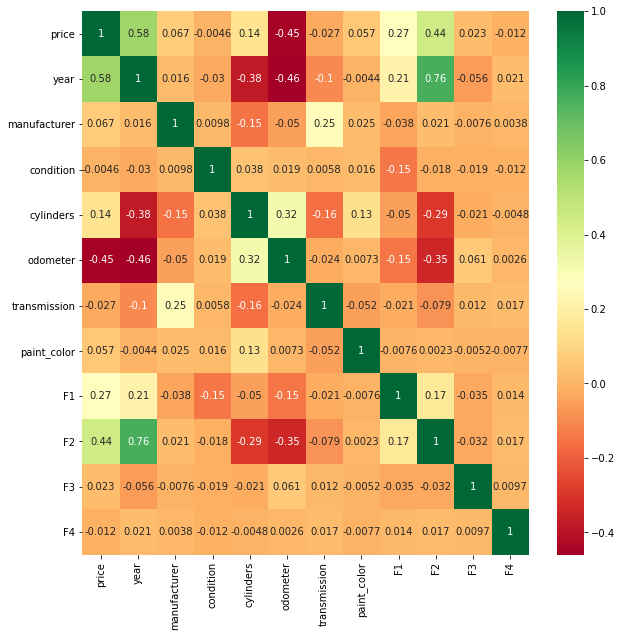

In [41]:
#Visualization of Correlation using Heat Map
corrmat= car_data.corr()
top_features=corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(car_data[top_features].corr(),annot=True,cmap="RdYlGn")

In [42]:
car_data.columns

Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'odometer',
       'transmission', 'paint_color', 'F1', 'F2', 'F3', 'F4'],
      dtype='object')

In [43]:
#First, we change the order of the features and we put the depedent variable at the end
features = ['condition', 'manufacturer', 'transmission','year',
       'cylinders', 'odometer', 'F1','F3','F4', 'price']

car_data = car_data.reindex(columns = features ) 
car_data.head(1)

,condition,manufacturer,transmission,year,cylinders,odometer,F1,F3,F4,price
0,0,1,0,2008.0,8,86238.0,5823,-0.031986,1,18219.0


# Feature Selection

In [44]:
training_cols=car_data.columns.tolist()[0:8]

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [46]:
def select_features(X_train, y_train):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    return fs

In [47]:
features= select_features(car_data[training_cols],car_data['price'])

In [48]:
print(features)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x7f015dff2820>)


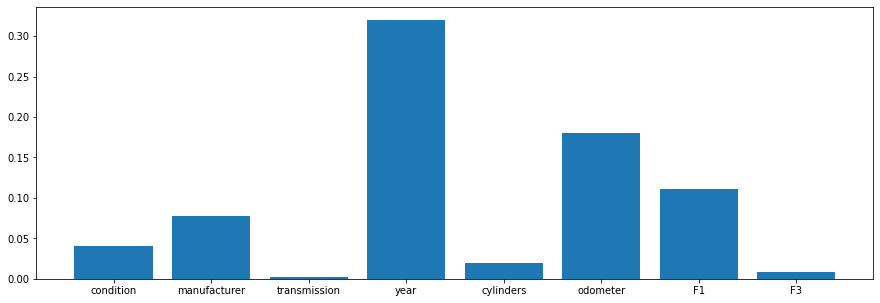

In [49]:
from matplotlib import pyplot
pyplot.figure(figsize=(15, 5))
pyplot.bar([i for i in training_cols], features.scores_)
pyplot.show()

# Model Selection

In [50]:
#Splitting the data into Independent and Dependent variables
X = car_data.iloc[:,:-1]  
y = car_data.iloc[:,-1]    

In [51]:
#Performing Test-Train-Valid Split in the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

In [52]:
#Using Linear Regression to Train the Model
from sklearn.linear_model import LinearRegression
car_model= LinearRegression()
car_model.fit(X_train,y_train)

LinearRegression()

In [53]:
#Predicting the Price of Car
car_pricepred=car_model.predict(X_test)
car_pricepred
car_pricepred = pd.DataFrame(car_pricepred)

In [54]:
len(X_train), len(X_test), len(X_val)

(5944, 743, 743)

# Model Evaluation

In [55]:
#Check the Performance of the Model against Validation data
from sklearn import metrics
a=np.sqrt(metrics.mean_squared_error(car_model.predict(X_val), y_val))
print('Root Mean Squared Error:',a)

Root Mean Squared Error: 4750.345892659398


In [56]:
#Accuracy Score Using R2
from sklearn.metrics import r2_score 
r2 = r2_score(y_test, car_pricepred) 
print('r2 score for perfect model is', r2) 

r2 score for perfect model is 0.5753914159307341


In [57]:
Linear_Prediction= pd.DataFrame(y_test)

In [58]:
Linear_Prediction.reset_index(inplace=True)

In [59]:
Linear_Prediction['Predicted Price']= car_pricepred

In [60]:
Linear_Prediction.drop(columns='index',inplace=True)

In [62]:
Linear_Prediction.to_csv("Results/Linear_Prediction.csv")

In [63]:
#Checking the Performance of Ridge Regression Technique
from sklearn.linear_model import Ridge
ridge_model= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_model.fit(X_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [64]:
price_ridge=ridge_model.predict(X_test)

In [65]:
Ridge_Prediction = pd.DataFrame(y_test)

In [66]:
Ridge_Prediction.reset_index(inplace=True)

In [67]:
Ridge_Prediction['Predicted Price']= price_ridge

In [68]:
Ridge_Prediction.drop(columns='index',inplace=True)

In [70]:
Ridge_Prediction.to_csv("Results/Ridge_Prediction.csv")

In [71]:
r2r = r2_score(y_test, price_ridge) 
print('r2 score for ridge model is', r2r) 

r2 score for ridge model is 0.5765556467313943


In [72]:
#Check the Performance of the Ridge Model against Validation data
b=np.sqrt(metrics.mean_squared_error(ridge_model.predict(X_val), y_val))
print('Root Mean Squared Error:',b)

Root Mean Squared Error: 4770.468044368714


In [73]:
#Checking the Performance of LASSO Technique
from sklearn import linear_model
lasso_model=linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_model.fit(X_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [74]:
price_lasso=lasso_model.predict(X_test)

In [75]:
Lasso_Prediction = pd.DataFrame(y_test)

In [76]:
Lasso_Prediction.reset_index(inplace=True)

In [77]:
Lasso_Prediction['Predicted Price']= price_ridge

In [78]:
Lasso_Prediction.drop(columns='index',inplace=True)

In [79]:
Lasso_Prediction.to_csv("Results/Lasso_Prediction.csv")

In [80]:
r2l = r2_score(y_test, price_lasso) 
print('r2 score for ridge model is', r2l) 

r2 score for ridge model is 0.5758154421602535


In [81]:
#Check the Performance of the LASSO against Validation data
c=np.sqrt(metrics.mean_squared_error(lasso_model.predict(X_val), y_val))
print('Root Mean Squared Error:',c)

Root Mean Squared Error: 4802.442535349683


In [82]:
results = pd.DataFrame({
    'Models': ['Linear Regression','Ridge Regression','LASSO'],
    'Accuracy': [r2, r2r, r2l],
    'RMSE': [a, b, c]})
results

,Models,Accuracy,RMSE
0,Linear Regression,0.575391,4750.345893
1,Ridge Regression,0.576556,4770.468044
2,LASSO,0.575815,4802.442535


/home/nshah/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

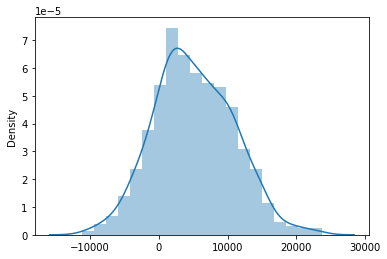

In [83]:
sns.distplot(y_test - car_pricepred)

Text(0.5, 1.0, 'Linear Regression')

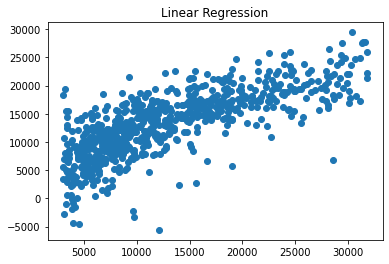

In [84]:
plt.scatter(y_test,car_pricepred)
plt.title("Linear Regression")